In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

from copy import copy
from pathlib import Path

# from My_libraries.my_stats import half_frame
from my_stats import half_frame

# Continuous random variables


## Uniform distribution 

Occurs for equi-probable random events.

The probability of an event is the inverse of length of the support interval. The probability density function is:

> $f(x; a, b) = \frac{1}{b-a}$     for       $a \le x \le b$

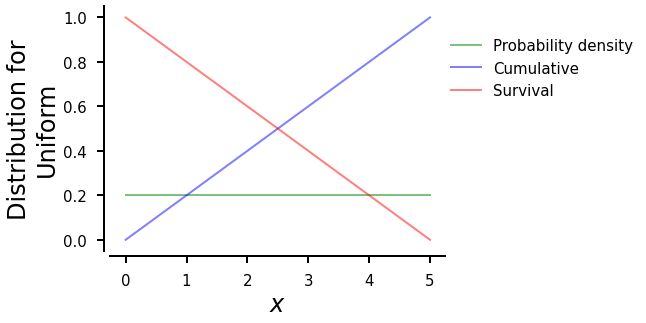

In [2]:
a = 0
b = 5
x = np.linspace(a, b)
f_x = stats.uniform(a, b)  # Generates asymptotic (frozen in scipy lingo) distribution .rvs( size)

fig = plt.figure( figsize = (6, 4.5) )
ax = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(ax, "$x$", "Distribution for\nUniform", font_size = my_font_size)

# Calculate and plot histogram
ax.plot(x, f_x.pdf(x), color = "g", linewidth = 2, alpha = 0.5, label = "Probability density")
ax.plot(x, f_x.cdf(x), color = "b", linewidth = 2, alpha = 0.5, label = "Cumulative")
ax.plot(x, f_x.sf(x), color = "r", linewidth = 2, alpha = 0.5, label = "Survival")

# Format legend
ax.legend(loc = (1.0, 0.6), frameon = False, markerscale = 1.8, fontsize = my_font_size)

plt.show()

## Exponential distribution 

Occurs for failure events. It can be seen as **the continuous limit of the geometric distribution**.

The probability density function is:

> $f(x; \lambda) = \lambda e^{- \lambda x}$     for       $ x \ge 0$

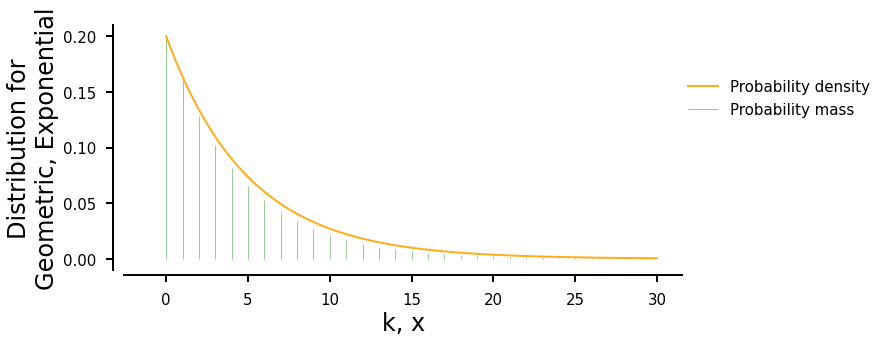

In [3]:
# Geometric
#
p = 0.2
k = np.arange(0, int(0.5 + stats.geom.ppf(0.999, p)))
f_k = stats.geom(p)

# Exponential
#
lamb = 1. / p
x = np.linspace(0, 6 * lamb)
f_x = stats.expon(0, lamb)

# Plot
#
fig = plt.figure( figsize = (10, 4.5) )
ax = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(ax, "k, x", "Distribution for\nGeometric, Exponential", font_size = my_font_size)

ax.vlines(k-1, 0, f_k.pmf(k), color = "g", linewidth = 1, alpha = 0.4, label = "Probability mass")
ax.plot(x, f_x.pdf(x), color = "orange", linewidth = 2, alpha = 0.9, label = "Probability density")
# ax.semilogy(x, f_x.pdf(x), color = "orange", linewidth = 2, alpha = 0.9, label = "Probability density")

# Format legend
ax.legend(loc = (1.0, 0.6), frameon = False, markerscale = 1.8, fontsize = my_font_size)


plt.show()

## Gaussian/normal/bell-shaped distribution 

Occurs as a consequence of the central limit theorem. The probability density function is:

> $f(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma}} e^{- (x - \mu)^2 / 2\sigma^2}$ 


The **central limit theorem** states that the sum of $N$ independent, identically-distributed (i.i.d.) and with finite standard deviation random variables converge to a Gaussian distribution as $N \to \infty$.  

**Let's test this in practice**.

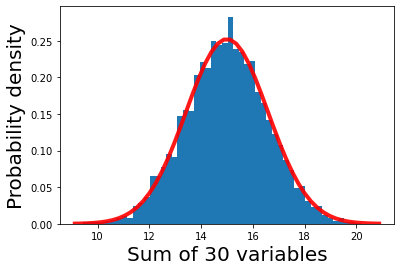

In [9]:
# Number and type of random variables being summed
#
n = 30
my_random = stats.uniform
a, b = 0, 1
my_mean = 0.5
my_var = (b - a) / 12.

# Corresponding Gaussian model
#
mu = n * my_mean
sigma = np.sqrt(n * my_var)
x = np.linspace(stats.norm.ppf(0.0001, mu, sigma), stats.norm.ppf(0.9999, mu, sigma))
f_x = stats.norm(mu, sigma)


many_times = 5000
sample_of_sums = []
for i in range(many_times):
    sample  = my_random.rvs(a, b, size = n)
    sample_of_sums.append(sum(sample))
    
plt.hist(sample_of_sums, bins = 50, density = True)
plt.plot(x, f_x.pdf(x), color = "r", linewidth = 4, alpha = 0.9, label = "Probability density")
plt.ylabel('Probability density', fontsize = 20)
plt.xlabel(f'Sum of {n} variables', fontsize = 20)

plt.show()

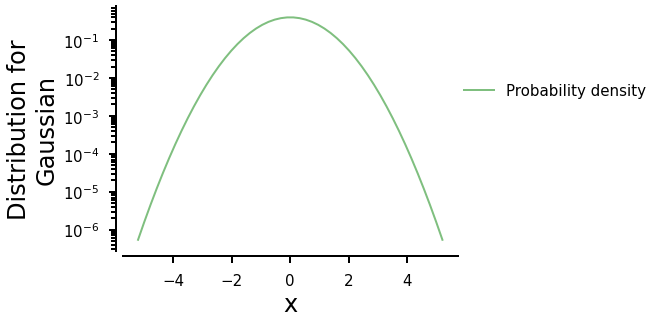

In [14]:
mu, sigma = 0, 1
x = np.linspace(stats.norm.ppf(0.0000001, mu, sigma), stats.norm.ppf(0.9999999, mu, sigma))
f = stats.norm(mu, sigma)

fig = plt.figure( figsize = (6, 4.5) )
ax = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(ax, "x", "Distribution for\nGaussian", font_size = my_font_size)

# Calculate and plot histogram
# ax.plot(x, f.pdf(x), color = "g", linewidth = 2, alpha = 0.5, label = "Probability density")
ax.semilogy(x, f.pdf(x), color = "g", linewidth = 2, alpha = 0.5, label = "Probability density")
# ax.plot(x, rv.cdf(x), color = "b", linewidth = 2, alpha = 0.5, label = "Cumulative")
# ax.plot(x, rv.sf(x), color = "r", linewidth = 2, alpha = 0.5, label = "Survival")

# Format legend
ax.legend(loc = (1.0, 0.6), frameon = False, markerscale = 1.8, fontsize = my_font_size)


plt.show()

## Gamma distribution 

The gamma distribution is a two-parameter family of continuous probability distributions. The exponential distribution, Erlang distribution, and chi-squared distribution are special cases of the gamma distribution.  

The probability density function is:

> $f(x; \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} ~ x^{\alpha - 1} ~ e^{-\beta x}$ for $x \ge 0$ 


where $\Gamma$ is the gamma function.

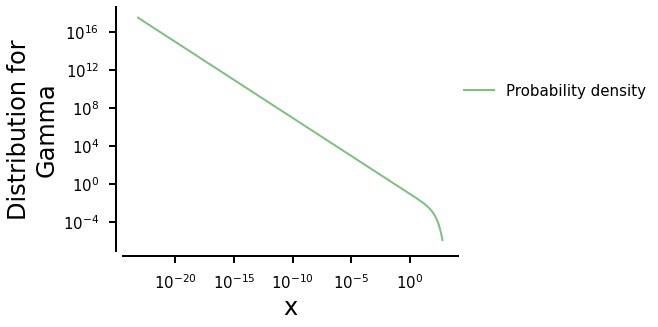

In [19]:
alpha, location, beta = 0.2, 0., 100
x = np.linspace(stats.gamma.ppf(0.00001, alpha, location, beta), 
                stats.gamma.ppf(0.9999, alpha, location, beta), 500)
f = stats.gamma(alpha, location, beta)

fig = plt.figure( figsize = (6, 4.5) )
ax = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(ax, "x", "Distribution for\nGamma", font_size = my_font_size)

# Calculate and plot histogram
ax.loglog(x, f.pdf(x), color = "g", linewidth = 2, alpha = 0.5, label = "Probability density")

# Format legend
ax.legend(loc = (1.0, 0.6), frameon = False, markerscale = 1.8, fontsize = my_font_size)

plt.show()

## Log-normal distribution 

The log-normal distribution is a two-parameter probability distribution. 

The probability density function is:

> $f(x; s) = \frac{1}{s~x~\sqrt{2\pi}} ~ \exp\left(-\frac{(\ln x)^2}{2s^2}\right)$

for $x > 0$ and $s > 0$.


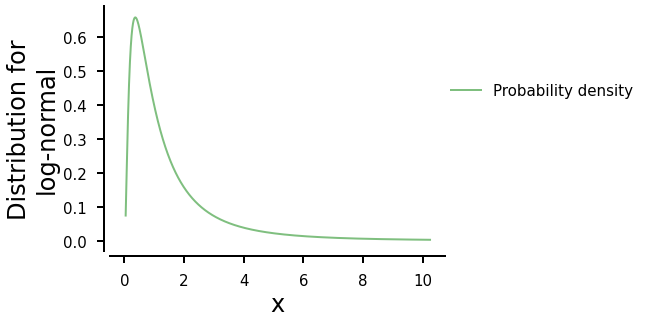

In [20]:
sigma, mu =  1., 0.
s = sigma

x = np.linspace( stats.lognorm.ppf(0.001, s, scale = np.exp(mu)), 
                 stats.lognorm.ppf(0.99, s, scale = np.exp(mu)), 5000)
f = stats.lognorm(s, scale = np.exp(mu))

fig = plt.figure( figsize = (6, 4.5) )
ax = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(ax, "x", "Distribution for\nlog-normal", font_size = my_font_size)

# Calculate and plot histogram
# ax.loglog(x, f.pdf(x), color = "g", linewidth = 2, alpha = 0.5, 
#           label = "Probability density")
ax.plot(x, f.pdf(x), color = "g", linewidth = 2, alpha = 0.5, 
          label = "Probability density")

# Format legend
ax.legend(loc = (1.0, 0.6), frameon = False, markerscale = 1.8, fontsize = my_font_size)

plt.show()

## Beta distribution 

The beta distribution is a family of continuous probability distributions defined on the interval [0, 1] parametrized by two positive shape parameters, denoted by $\alpha$ and $\beta$, that appear as exponents of the random variable and control the shape of the distribution. It is a special case of the **Dirichlet distribution**.

**The beta distribution is a suitable model for the random behavior of percentages and proportions**. The beta distribution has been applied to model the behavior of random variables limited to intervals of finite length in a wide variety of disciplines.

In Bayesian inference, the beta distribution is the conjugate prior probability distribution for the Bernoulli, binomial, negative binomial and geometric distributions. For example, the beta distribution can be used in Bayesian analysis to describe initial knowledge concerning probability of success such as the probability that a space vehicle will successfully complete a specified mission.  

The probability density function is:

> $f(x; \alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} ~ x^{\alpha - 1} ~ (1-x)^{\beta -1}$ for $0 \le x \le 1$ 


where $\Gamma$ is the gamma function.

The shape of the distribution (single-peak versus bimodal) is determined by whether $\alpha = \beta$ and whether they are smaller or greater than 1.

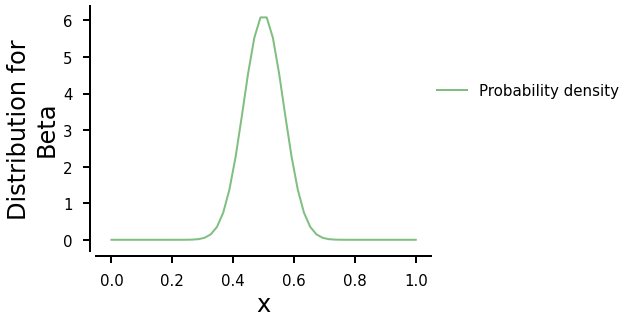

In [37]:
alpha, beta = 30., 30.
x = np.linspace(0, 1)
f = stats.beta(alpha, beta)

fig = plt.figure( figsize = (6, 4.5) )
ax = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(ax, "x", "Distribution for\nBeta", font_size = my_font_size)

# Calculate and plot histogram
ax.plot(x, f.pdf(x), color = "g", linewidth = 2, alpha = 0.5, label = "Probability density")
# ax.plot(x, f.cdf(x), color = "b", linewidth = 2, alpha = 0.5, label = "Cumulative")
# ax.plot(x, f.sf(x), color = "r", linewidth = 2, alpha = 0.5, label = "Survival")

# Format legend
ax.legend(loc = (1.0, 0.6), frameon = False, markerscale = 1.8, fontsize = my_font_size)


plt.show()